In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

In [7]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [8]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)


In [9]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [10]:
#Shape of the data set
claimants.shape

(1340, 6)

In [11]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [12]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
print(X)
print(Y)

      CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        0.0       1.0       0.0    50.0  34.940
1        1.0       0.0       0.0    18.0   0.891
2        0.0       1.0       0.0     5.0   0.330
3        0.0       1.0       1.0    31.0   0.037
4        0.0       1.0       0.0    30.0   0.038
...      ...       ...       ...     ...     ...
1334     1.0       1.0       0.0    16.0   0.060
1336     1.0       1.0       0.0    46.0   3.705
1337     1.0       1.0       0.0    39.0   0.099
1338     1.0       0.0       0.0     8.0   3.177
1339     1.0       1.0       0.0    30.0   0.688

[1096 rows x 5 columns]
0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64


In [13]:
Y.value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [14]:
#Logistic regression and fit the model
#it takes probability function
classifier = LogisticRegression()
classifier.fit(X,Y)
#classifier.write_to_pickle('path of file.pkl')

LogisticRegression()

In [15]:
#Predict for X dataset
#predict on test data
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
classifier.predict(X)[43]

0

In [17]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [18]:
y_pred_df
#erroe on 5,12,13

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


# error in matrix

In [19]:
# Confusion Matrix for the model accuracy
#mae,rmse,mse
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)

#381+395 is correct classifiction
#123+197 remaining misclassification

[[381 197]
 [123 395]]


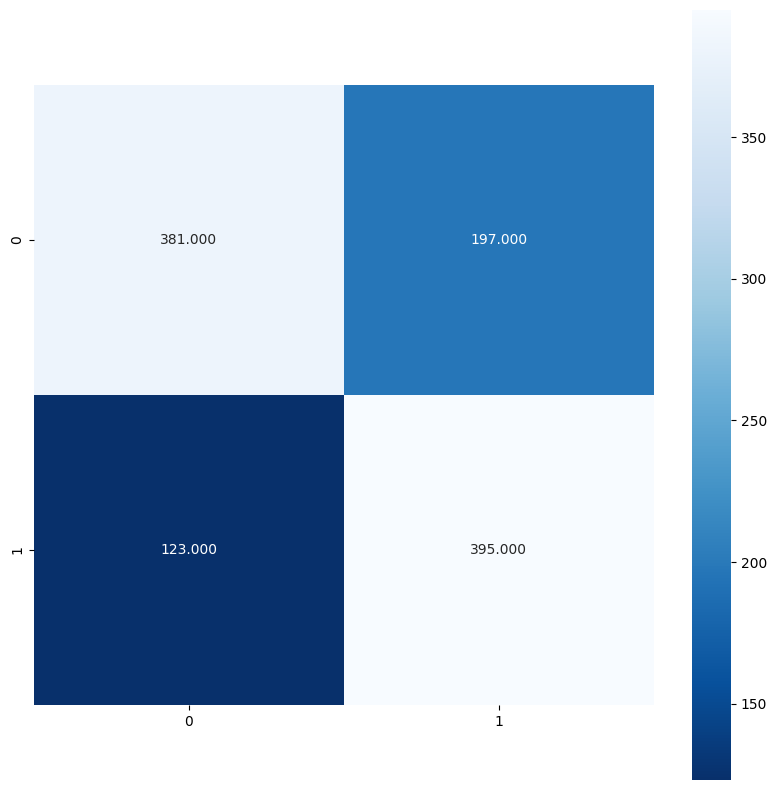

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt=".3f",square=True,cmap="Blues_r");

In [21]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [22]:
395/(197+395)
#formula of precision of 1

0.6672297297297297

In [23]:
#Classification report
#its like summary
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



# functions for precision,accuraccy ,recall
#P(y=1/x)

In [24]:
classifier.predict_proba(X)[43]
#0=9.99.......   and 1=3.046.......

array([0.62319116, 0.37680884])

In [25]:
# ROC Curve
#An ROC (Receiver Operating Characteristic) curve is a useful graphical tool to evaluate the performance of a binary classifier as its discrimination threshold is varied. To understand the ROC curve, we should first get familiar
#with a binary classifier and the confusion matrix.

Text(0, 0.5, 'True Positive Rate')

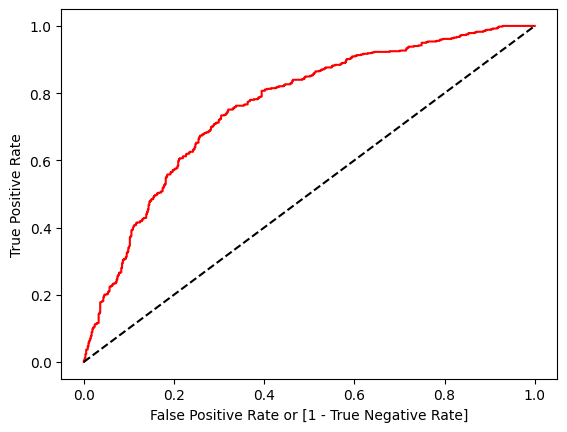

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
#fpr = recall,tpr=precision
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [27]:
#area under curve
auc

0.7108589063606365

In [28]:
#can we changed the value thresholds?
thresholds

array([1.79054593e+00, 7.90545935e-01, 7.87863385e-01, 7.80438455e-01,
       7.77395844e-01, 7.76462373e-01, 7.62275971e-01, 7.61429713e-01,
       7.53158678e-01, 7.51243537e-01, 7.48992067e-01, 7.47934566e-01,
       7.43891339e-01, 7.43489999e-01, 7.39028665e-01, 7.38313952e-01,
       7.35520206e-01, 7.34774649e-01, 7.33204355e-01, 7.32598687e-01,
       7.28818243e-01, 7.28598763e-01, 7.24064656e-01, 7.23091737e-01,
       7.21417349e-01, 7.20951087e-01, 7.20791088e-01, 7.20610901e-01,
       7.18246894e-01, 7.17902002e-01, 7.17597383e-01, 7.17060100e-01,
       7.16867628e-01, 7.15302513e-01, 7.12082039e-01, 7.11943596e-01,
       7.10388317e-01, 7.09792061e-01, 7.08524027e-01, 7.07806569e-01,
       7.03971943e-01, 7.03570516e-01, 7.03325374e-01, 7.03012024e-01,
       7.02442673e-01, 7.01803943e-01, 7.00108315e-01, 7.00037432e-01,
       6.99357008e-01, 6.99300941e-01, 6.98492330e-01, 6.98009381e-01,
       6.97704110e-01, 6.97361014e-01, 6.97356794e-01, 6.97233981e-01,
      